**exercises with statsmodels OLS and WLS**
*created by fbb November 2018*


In [40]:
from __future__ import print_function, division
from IPython.display import display
import pylab as pl

import os
import json

import statsmodels.api as sm
import statsmodels.formula.api as smf

os.environ['PUI2018']='/nfshome/tn1050/PUI2018'
s = json.load( open(os.getenv('PUI2018')+"/PUI2018_fb55/fbb_matplotlibrc.json") )
s.pop('svg.embed_char_paths')
plt.rcParams.update(s)

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [4]:
def errors(x):
    return np.sqrt(x)
    

def line(a, x, b=0, errors=None):
    '''
    creates a line from parameters and exogenous variable
    a: slope
    x: exogenous variable
    b: intercept - default 0
    errors: add uncertainties (sqrt(N) - default True)
    '''
    np.random.randn(123)
    if errors is None:
        return a*x + b 
    else:
        return a*x + b + np.random.randn(len(x)) * errors(x)

# create a line with a chosen slope and intercept = 0 and plot it with uncertainties as errorbars

use the functions created above

<ErrorbarContainer object of 3 artists>

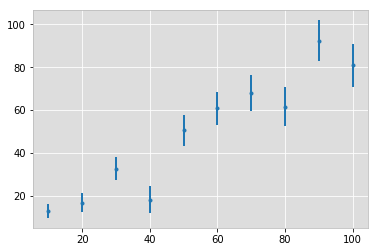

In [52]:
x = np.linspace(10,100,10)
y = line(0.9,x,0,errors)

errorbar(x,y, yerr=np.sqrt(x), fmt='.', label = "and some structure")

scatter plot of randomized number with my chosen slope of 0.9 and error bar of the squared result of data

# print y, x, and the result of applying statsmodels.api.add_constant() to x

In [53]:
import pandas as pd
x_addConstant = sm.add_constant(x)
pd.DataFrame([x, y, x_addConstant], index=['x', 'y', 'x_addConstant'])

,0,1,2,3,4,5,6,7,8,9
x,10,20,30,40,50,60,70,80,90,100
y,12.9443,16.9306,32.7472,18.2108,50.5132,60.8397,68.0631,61.674,92.3694,80.8162
x_addConstant,"[1.0, 10.0]","[1.0, 20.0]","[1.0, 30.0]","[1.0, 40.0]","[1.0, 50.0]","[1.0, 60.0]","[1.0, 70.0]","[1.0, 80.0]","[1.0, 90.0]","[1.0, 100.0]"


# use statsmodels.api.OLS to fit x and y 
- *the wrong way*: by passing x as exogenous variable
- *the right way*: by passing statsmodels.api.add_constant(x) as exogenous variable

print the model summary for each and discuss the differences

In [54]:
#THE WRONG WAY
smfitA = smf.OLS(y, x).fit()
smfitA.summary()

/nfshome/tn1050/.conda/envs/geopandas/lib/python3.6/site-packages/scipy/stats/stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.975
Model:                            OLS   Adj. R-squared:                  0.972
Method:                 Least Squares   F-statistic:                     352.0
Date:                Mon, 12 Nov 2018   Prob (F-statistic):           1.60e-08
Time:                        23:51:32   Log-Likelihood:                -36.025
No. Observations:                  10   AIC:                             74.05
Df Residuals:                       9   BIC:                             74.35
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.8948      0.048     18.761      0.000       0.787       1.003
==============================================================================
Omnibus:                        1.652   Durbin-Watson:                   2.921
Prob(Omnibus):                  0.438   Jarque-Bera (JB):                1.101
Skew:                          -0.732   Prob(JB):                        0.577
Kurtosis:                       2.294   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [55]:
#THE RIGHT WAY
smfitB = smf.OLS(y, x_addConstant).fit()
smfitB.summary()

/nfshome/tn1050/.conda/envs/geopandas/lib/python3.6/site-packages/scipy/stats/stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.890
Model:                            OLS   Adj. R-squared:                  0.876
Method:                 Least Squares   F-statistic:                     64.43
Date:                Mon, 12 Nov 2018   Prob (F-statistic):           4.26e-05
Time:                        23:51:34   Log-Likelihood:                -35.998
No. Observations:                  10   AIC:                             76.00
Df Residuals:                       8   BIC:                             76.60
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.3963      6.763      0.206      0.842     -14.198      16.991
x1             0.8748      0.109      8.027      0.000       0.623       1.126
==============================================================================
Omnibus:                        1.514   Durbin-Watson:                   2.930
Prob(Omnibus):                  0.469   Jarque-Bera (JB):                0.935
Skew:                          -0.693   Prob(JB):                        0.627
Kurtosis:                       2.433   Cond. No.                         134.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# plot the data (as points) and both statsmodels fits

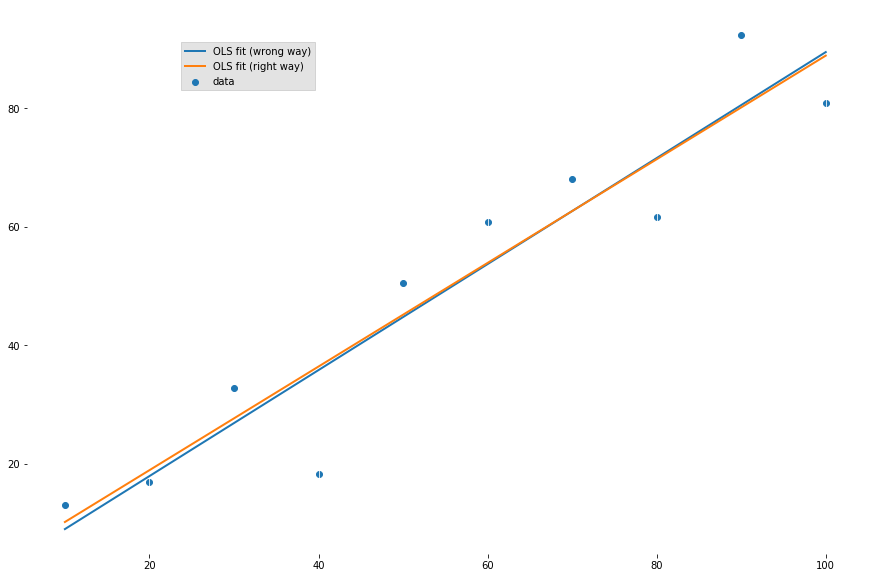

In [56]:
ax = pl.figure(figsize=(15, 10)).add_subplot(111, frameon=False)

ax.scatter(x, y, label = 'data')
ax.plot(x, smfitA.predict(x), label='OLS fit (wrong way)')
ax.plot(x, smfitB.predict(x_addConstant), label='OLS fit (right way)')

pl.legend().set_bbox_to_anchor((0.35, 0.95, 0, 0))

plot of OLS model line fit done the wrong way, without adding constant, and the right way after adding constant.


# create a line with a chosen slope and a chosen intercept >=100*slope and plot it with uncertainties as errorbars

<ErrorbarContainer object of 3 artists>

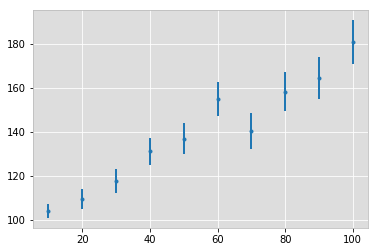

In [57]:
m = 0.9
x = np.linspace(10,100,10)
y = line(m,x,(m*100)+1,errors)

errorbar(x,y, yerr=np.sqrt(x), fmt='.', label = "and some structure")

# repeat step 3

In [59]:
x_addConstant = sm.add_constant(x)
smfitC = smf.OLS(y, x).fit()
display(smfitC.summary())
smfitD = smf.OLS(y, x_addConstant).fit()
display(smfitD.summary())

/nfshome/tn1050/.conda/envs/geopandas/lib/python3.6/site-packages/scipy/stats/stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.890
Method:                 Least Squares   F-statistic:                     81.77
Date:                Mon, 12 Nov 2018   Prob (F-statistic):           8.21e-06
Time:                        23:53:20   Log-Likelihood:                -52.173
No. Observations:                  10   AIC:                             106.3
Df Residuals:                       9   BIC:                             106.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             2.1679      0.240      9.043      0.000       1.626       2.710
==============================================================================
Omnibus:                        1.780   Durbin-Watson:                   0.119
Prob(Omnibus):                  0.411   Jarque-Bera (JB):                0.785
Skew:                          -0.024   Prob(JB):                        0.675
Kurtosis:                       1.628   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

/nfshome/tn1050/.conda/envs/geopandas/lib/python3.6/site-packages/scipy/stats/stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     138.1
Date:                Mon, 12 Nov 2018   Prob (F-statistic):           2.51e-06
Time:                        23:53:21   Log-Likelihood:                -31.309
No. Observations:                  10   AIC:                             66.62
Df Residuals:                       8   BIC:                             67.22
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         95.6606      4.231     22.608      0.000      85.903     105.418
x1             0.8014      0.068     11.752      0.000       0.644       0.959
==============================================================================
Omnibus:                        1.644   Durbin-Watson:                   2.621
Prob(Omnibus):                  0.439   Jarque-Bera (JB):                0.077
Skew:                          -0.052   Prob(JB):                        0.962
Kurtosis:                       3.417   Cond. No.                         134.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# repeat step 4

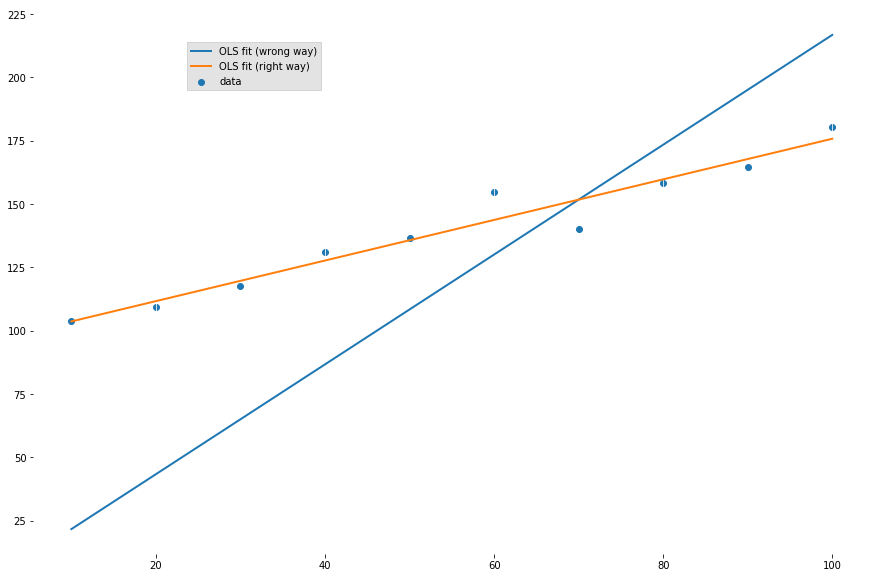

In [60]:
ax = pl.figure(figsize=(15, 10)).add_subplot(111, frameon=False)

ax.scatter(x, y, label = 'data')
ax.plot(x, smfitC.predict(x), label='OLS fit (wrong way)')
ax.plot(x, smfitD.predict(x_addConstant), label='OLS fit (right way)')

pl.legend().set_bbox_to_anchor((0.35, 0.95, 0, 0))

repeating the same steps as before, except this time using a higher y intercept. this shows how the wrong way is very misleading and definitely does not fit the line if we were to choose a data with higher intercept.

# now fit the data with WLS weighted least square, a linear fit that takes into account the uncertainties by "down-weighting" (considering less important) observations with large uncertainties

you should at this point ask: how can I create weights from my uncertainties? The answer, as often is the case, is not unique. But a rule of thumb is that the weights would be the _inverse_ (remember: larger error must mean smaller weight) of the variance, with is the standard deviation square. Look at the error() function I create and design your weights array according to this rule

In [87]:
wls = sm.WLS(y,x_addConstant, weights=np.sqrt(x*100))
wlsfit = wls.fit()
wlsfit.summary()

/nfshome/tn1050/.conda/envs/geopandas/lib/python3.6/site-packages/scipy/stats/stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.929
Model:                            WLS   Adj. R-squared:                  0.921
Method:                 Least Squares   F-statistic:                     105.4
Date:                Tue, 13 Nov 2018   Prob (F-statistic):           6.98e-06
Time:                        21:34:51   Log-Likelihood:                -32.247
No. Observations:                  10   AIC:                             68.49
Df Residuals:                       8   BIC:                             69.10
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         95.7771      5.372     17.829      0.000      83.390     108.165
x1             0.7997      0.078     10.265      0.000       0.620       0.979
==============================================================================
Omnibus:                        1.676   Durbin-Watson:                   2.613
Prob(Omnibus):                  0.432   Jarque-Bera (JB):                0.097
Skew:                          -0.125   Prob(JB):                        0.953
Kurtosis:                       3.414   Cond. No.                         177.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# you can also use other statsmodels functions, for example statsmodels.formula.api which allows to pass an equation
again, make sure that your formula supports an intercept

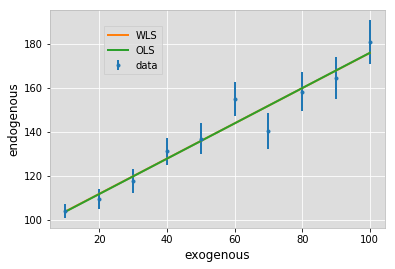

In [92]:
# statsmodels.formula.api accepts dictionaris, pandas dataframes, and python rec arrays as input: 
# all data types that host data paired with labels
smfmodel = smf.ols('y ~ x + const', data={'x':x, 'y':y, 'const':x_addConstant}).fit()
# wlsfmodel = smf.wls('y ~ x + const', data={'x':x, 'y':y, 'const':x_addConstant}).fit()
pl.errorbar(x, y, yerr=errors(x), fmt='.', label='data')
pl.plot(x, wlsfit.fittedvalues, '-', label="WLS")
pl.plot(x, smfmodel.fittedvalues, '-', label="OLS")
pl.xlabel("exogenous")
pl.ylabel("endogenous")
pl.legend().set_bbox_to_anchor((0.35, 0.95, 0, 0))
# pl.legend();

same plots as before, with the correct OLS and WLS model fit, but now using the statsmodel function.